In [2]:
import glob
import pdftotext
from datetime import datetime
import spacy
import re
import nltk
import sys
from tqdm import tqdm 
from time import sleep 
import textacy

sys.path.append("/media/gabriel/Data/Projects/cev/noun-phrases/")
from src.util.common import Common

In [3]:
path = "/media/gabriel/Data/temp/scraping-master/sentencias_JyP/ext_data/output/sentencias/"

In [4]:

list_files = glob.glob(path+"*.pdf")
print(list_files[1:2])


['/home/gabriel/NAS-Current/download/scraping-master/scraping-master/sentencias_JyP/ext_data/output/sentencias/sentencias/Aramis Machado Ortiz_29-jun-11.pdf']


In [5]:
import calendar
print(list(calendar.month_abbr))

['', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']


In [16]:
# Load 
count = 0 
list_texts_corpus = []
for i in tqdm(range(0, len(list_files)), desc ="Read Corpus"):  
    single_file = list_files[i]
    error_flag = False
    count += 1
    name = single_file.replace(path, '').split("_")
    date_time_str = name[1].replace('.pdf', '').replace('dic', 'dec').replace('agt','aug').replace('abr', 'apr').replace('ago', 'aug').replace('ene', 'jan').replace('2014', '14')
    try:
        date_time_obj = datetime.strptime(date_time_str, '%d-%b-%y')
    except:
        error_flag = True
        print(single_file)
        print("Error casting data.")
 
    file_name = name[0].replace(path, '')
    file_name = file_name.replace(date_time_str, '')
    file_name = file_name.replace('.pdf', '')
    
    with open(single_file, "rb") as f:
            pdf = pdftotext.PDF(f)
    if count % 10 == 0:
        break
    sigle_dict = {'path': single_file, 'file_name': file_name, 'date': date_time_obj, 'year': date_time_obj.year, 'month': date_time_obj.month, 'day': date_time_obj.day, 'num_pages': len(pdf), 'pages_raw': list(pdf),  
                  'text_raw': "\n\n".join(pdf), 'sentences': [], 'doc_parser': []}
#     print('\t -> ', count, date_time_str, 'file_name', sigle_dict['file_name'], 'date', sigle_dict['date'], 'num_pages', sigle_dict['num_pages'])
    list_texts_corpus.append(sigle_dict)

Read Corpus:   4%|▍         | 3/79 [00:04<01:55,  1.52s/it]


In [17]:
count = 0
for item in list_texts_corpus:
    count += 1
    print('-> ', count, '\tfile_name:', item['file_name'][:50].zfill(50).replace('0', ' '), '\tdate:', item['date'], '\tnum_pages:', item['num_pages'])

->  1 	file_name:                              Alexi Mancilla García 	date: 2016-06-15 00:00:00 	num_pages: 449
->  2 	file_name:                               Aramis Machado Ortiz 	date: 2011-06-29 00:00:00 	num_pages: 38
->  3 	file_name:       Armando Madriaga Picón y Jesús Noraldo Basto 	date: 2013-12-06 00:00:00 	num_pages: 291


In [30]:
name_global_model_spacy = "es_core_news_sm"
nlp = spacy.load(name_global_model_spacy)
pattern = r'(<VERB>?<ADV>*<VERB>+)'
verb_pattern = [{"POS": "VERB", "OP": "*"},{"POS": "ADV", "OP": "*"},{"POS": "VERB", "OP": "+"},{"POS": "PART", "OP": "*"}]

In [9]:
text_page = list_texts_corpus[0]['pages_raw'][1]
print(text_page)
count = 0
doc = nlp(text_page)
# print(doc.text)
# for token in doc:
#     print(token.text, token.pos_, token.dep_)
for np in doc.noun_chunks:
    count += 1 
    print('\t', count, 'chunk', np.text)
    if count == 20:
        break

                                                       Alexi Mancilla García
                                                           Rad. 2006 80848
                              POSTULADO
      Alexi Mancilla García, conocido con el alias de “Zambrano” nació
el 1 de febrero de 1966 en la ciudad de Cartagena de Indias. Hijo de
Manuel Mancilla Bolívar (fallecido) y Eva García Julio Peña, con diez
hermanos. Estuvo casado con Cecilia Calderón Manrique de la cual se
divorció y es padre de dos hijos.
      Por orden de trabajo No. 12045 de 2011 se realizó el informe de
plena identidad en el que se concluyó que una vez hecho el cotejo de
las huellas que aparecen en la copia de la tarjeta decadactilar con la
impresa en la tarjeta expedida por la Registraduría Nacional del Estado
Civil, corresponde -en ambos casos- a Alexi Mancilla García con
cédula de ciudadanía No. 98.530.085 de María la Baja (Bolívar).
      Residió en el municipio de María la Baja y estudió hasta cuarto
de bachillerato 

In [10]:
text_page = re.sub('\s+',' ', list_texts_corpus[0]['pages_raw'][1])
print(text_page)
count = 0
doc = nlp(text_page)
# print(doc.text)
# for token in doc:
#     print(token.text, token.pos_, token.dep_)
for np in doc.noun_chunks:
    count += 1 
    print('\t', count, 'chunk', np.text)
    if count == 20:
        break


 Alexi Mancilla García Rad. 2006 80848 POSTULADO Alexi Mancilla García, conocido con el alias de “Zambrano” nació el 1 de febrero de 1966 en la ciudad de Cartagena de Indias. Hijo de Manuel Mancilla Bolívar (fallecido) y Eva García Julio Peña, con diez hermanos. Estuvo casado con Cecilia Calderón Manrique de la cual se divorció y es padre de dos hijos. Por orden de trabajo No. 12045 de 2011 se realizó el informe de plena identidad en el que se concluyó que una vez hecho el cotejo de las huellas que aparecen en la copia de la tarjeta decadactilar con la impresa en la tarjeta expedida por la Registraduría Nacional del Estado Civil, corresponde -en ambos casos- a Alexi Mancilla García con cédula de ciudadanía No. 98.530.085 de María la Baja (Bolívar). Residió en el municipio de María la Baja y estudió hasta cuarto de bachillerato en el colegio Rafael Uribe Uribe. En el año 1984 ingresó al Ejército Nacional como soldado del Batallón de Infantería No. 6 de Cartagena ubicado en Riohacha (Gua

In [11]:
print('part 1')
text_page1 = list_texts_corpus[0]['text_raw']
# print(text_page1)
sents = nltk.sent_tokenize(text_page1)
print('# sents:',len(sents), "sample: ", sents[1:4])
print('='*150)
print('part 2')
text_page2 = list_texts_corpus[0]['text_raw']
text_page2 = re.sub('\n+',' ', text_page2)
text_page2 = re.sub('\s+',' ', text_page2)
# print(text_page2)
sents2 = nltk.sent_tokenize(text_page2)
print('# sents:',len(sents), "sample: ", sents2[1:4])


part 1
# sents: 5777 sample:  ['007 de 2016.', 'Bogotá, D.C., 15 de junio de dos mil dieciséis (2016).', 'DECISIÓN\n      Agotada la audiencia de control formal y material de los cargos,\nsolicitada por el Fiscal 11 de la Unidad de Justicia Transicional y\nfinalizado el incidente de reparación integral, procede la sala a proferir\nsentencia parcial, bajo los lineamientos del artículo 24 de la Ley 975\nde 2005, contra el postulado por el Gobierno Nacional ALEXI\nMANCILLA GARCÍA, a.']
part 2
# sents: 5777 sample:  ['007 de 2016.', 'Bogotá, D.C., 15 de junio de dos mil dieciséis (2016).', 'DECISIÓN Agotada la audiencia de control formal y material de los cargos, solicitada por el Fiscal 11 de la Unidad de Justicia Transicional y finalizado el incidente de reparación integral, procede la sala a proferir sentencia parcial, bajo los lineamientos del artículo 24 de la Ley 975 de 2005, contra el postulado por el Gobierno Nacional ALEXI MANCILLA GARCÍA, a.']


In [29]:
count_sent = 0
for item in sents2[15:17]:
    count_sent += 1
    print('sent # ', count_sent, '-'*150)
    print('\t without process:', item)
    doc = nlp(item)
    for np in doc.noun_chunks:
        count += 1 
        print('\t\t wp false:', count, 'chunk:', np.text)
    #item = re.sub('[\W_]+', ' ', item, flags=re.UNICODE) # [^A-Za-z0-9_] [\W_] [^-/().&' \w]|_
    item = re.sub(r"[^- \w]|_", "", item)    
    print('\t with process:', item)
    doc = nlp(item)
    np_state = True
    for np in doc.noun_chunks:
        np_state = False
        count += 1 
        print('\t\t wp true:', count, 'chunk:', np.text)
    if np_state:
        print('\t\t error: This sentence has no noun phrase.')
    noun_pharses=set()
    noun_pharses_nc=[]    
    for nc in doc.noun_chunks:
        noun_dict = {'nc': nc, 'np': []}
        for np in [nc, doc[nc.root.left_edge.i:nc.root.right_edge.i+1]]:
            noun_dict['np'].append(np)
        # noun_pharses.add(np)
        noun_pharses_nc.append(noun_dict)
    print('\t\t wp nc true:', noun_pharses_nc)
    verb_pattern = [{"POS": "VERB", "OP": "*"},{"POS": "ADV", "OP": "*"},{"POS": "VERB", "OP": "+"},{"POS": "PART", "OP": "*"}]
    nlp_verb_phrases = textacy.make_spacy_doc(item, lang=name_global_model_spacy)
#     verb_phrases = textacy.extract.pos_regex_matches(nlp_verb_phrases, pattern)
#     # Print all Verb Phrase
#     for chunk in verb_phrases:
#         print('\t\t wp nc true verb_phrases:', chunk.text)
    verb_phrases_2 = textacy.extract.matches(nlp_verb_phrases, verb_pattern)
    for chunk in verb_phrases_2:
        print('\t\t wp nc true verb_phrases 2:', chunk.text)


sent #  1 ------------------------------------------------------------------------------------------------------------------------------------------------------
	 without process: Posteriormente, se unió a la Escuela de Suboficiales Inocencio Chinga de Tolemaida, institución que en 1991 lo ascendió al rango de Cabo Segundo, y fue trasladado a Cartago (Valle), para desempeñarse como escolta del Mayor General Zúñiga Chaparro en la Tercera División de Infantería de Cali.
		 wp false: 87 chunk: se
		 wp false: 88 chunk: la Escuela de Suboficiales Inocencio Chinga de Tolemaida
		 wp false: 89 chunk: institución
		 wp false: 90 chunk: 1991
		 wp false: 91 chunk: lo
		 wp false: 92 chunk: rango
		 wp false: 93 chunk: Cabo Segundo
		 wp false: 94 chunk: Cartago
		 wp false: 95 chunk: Valle
		 wp false: 96 chunk: escolta
		 wp false: 97 chunk: Mayor General Zúñiga Chaparro
		 wp false: 98 chunk: la Tercera División de Infantería de Cali
	 with process: Posteriormente se unió a la Escuela de Sub

In [25]:
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [31]:

for i in tqdm(range(0, len(list_texts_corpus)), desc ="Structure Corpus"):  
    single_doc = list_texts_corpus[i]   
    count_page = 0
    count_sent = 0
    count_sent_local = 0
    for page_raw in single_doc['pages_raw']:
        count_page += 1
        count_sent_local = 0
        text_raw = page_raw
        text_raw = re.sub('\n+',' ', text_raw)
        text_raw = re.sub('\s+',' ', text_raw)
        sents_raw = nltk.sent_tokenize(text_raw)
        for item in sents_raw:
            dict_sent = {'page': count_page, 'local_sent': count_sent_local, 'global_sent': count_sent, 'text_raw': item, 'text_clear': '', 'chunks': [], 'verbs': []}
            count_sent += 1
            count_sent_local += 1
            item = re.sub(r"[^- \w]|_", "", item)
            dict_sent['text_clear'] = item            
#             if count_sent % 100 == 0:
#                 print('sent # ', count_sent, '-'*150)
#                 print('\t with process:', item)
            doc = nlp(item)
            np_state = True
            count_chunk = 0
            for np in doc.noun_chunks:
                np_state = False
                count_chunk += 1 
                dict_sent['chunks'].append({'num': count_chunk, 'text': np.text})
            nlp_verb_phrases = textacy.make_spacy_doc(item, lang=name_global_model_spacy)
            verb_phrases = textacy.extract.matches(nlp_verb_phrases, verb_pattern)
            count_chunk = 0
            for vp in verb_phrases:
                count_chunk += 1 
                dict_sent['verbs'].append({'num': count_chunk, 'text': vp.text})                
#                 if count_sent % 100 == 0:
#                     print('\t\t wp true:', count, 'chunk:', np.text)
#             if np_state:
#                 if count_sent % 100 == 0:
#                     print('\t\t error: This sentence has no noun phrase.')                    
            list_texts_corpus[i]['sentences'].append(dict_sent)


Structure Corpus: 100%|██████████| 3/3 [02:25<00:00, 48.48s/it]


In [35]:
print(list_texts_corpus[0]['sentences'][3])

{'page': 1, 'local_sent': 3, 'global_sent': 3, 'text_raw': 'DECISIÓN Agotada la audiencia de control formal y material de los cargos, solicitada por el Fiscal 11 de la Unidad de Justicia Transicional y finalizado el incidente de reparación integral, procede la sala a proferir sentencia parcial, bajo los lineamientos del artículo 24 de la Ley 975 de 2005, contra el postulado por el Gobierno Nacional ALEXI MANCILLA GARCÍA, a.', 'text_clear': 'DECISIÓN Agotada la audiencia de control formal y material de los cargos solicitada por el Fiscal 11 de la Unidad de Justicia Transicional y finalizado el incidente de reparación integral procede la sala a proferir sentencia parcial bajo los lineamientos del artículo 24 de la Ley 975 de 2005 contra el postulado por el Gobierno Nacional ALEXI MANCILLA GARCÍA a', 'chunks': [{'num': 1, 'text': 'DECISIÓN'}, {'num': 2, 'text': 'la audiencia'}, {'num': 3, 'text': 'control'}, {'num': 4, 'text': 'los cargos'}, {'num': 5, 'text': 'el Fiscal 11 de la Unidad d

In [36]:
# noun_pharses=set()    
# for nc in doc.noun_chunks:
#     for np in [nc, doc[nc.root.left_edge.i:nc.root.right_edge.i+1]]:
#        noun_pharses.add(np)

Alexi Mancilla García
Aramis Machado Ortiz
Armando Madriaga Picón y Jesús Noraldo Basto
['Alexi Mancilla García', 'Aramis Machado Ortiz', 'Armando Madriaga Picón y Jesús Noraldo Basto']
80160 9429
[('alexi mancilla garcía rad', 1370), ('la fecha', 956), ('las víctimas', 923), ('la ley', 795), ('el artículo', 732), ('2006 80848', 658), ('la sala', 624), ('la fiscalía', 617), ('la víctima', 611), ('tribunal superior de bogotá sala de justicia y paz radicado', 580), ('la pena', 513), ('la vida', 505), ('alexi mancilla garcía', 497), ('los hechos', 492), ('la suma', 462), ('la liquidación', 450), ('la muerte', 450), ('jesús noraldo basto león', 436), ('la sentencia', 429), ('la fórmula', 378), ('las operaciones', 324), ('el daño', 292), ('la cual', 287), ('el postulado', 253), ('un periodo', 252), ('la conducta', 238), ('los hijos', 228), ('el municipio', 214), ('las personas', 212), ('código penal', 212), ('lucro cesante consolidado', 209), ('la ley 599 de 2000', 206), ('la paz', 200), ('

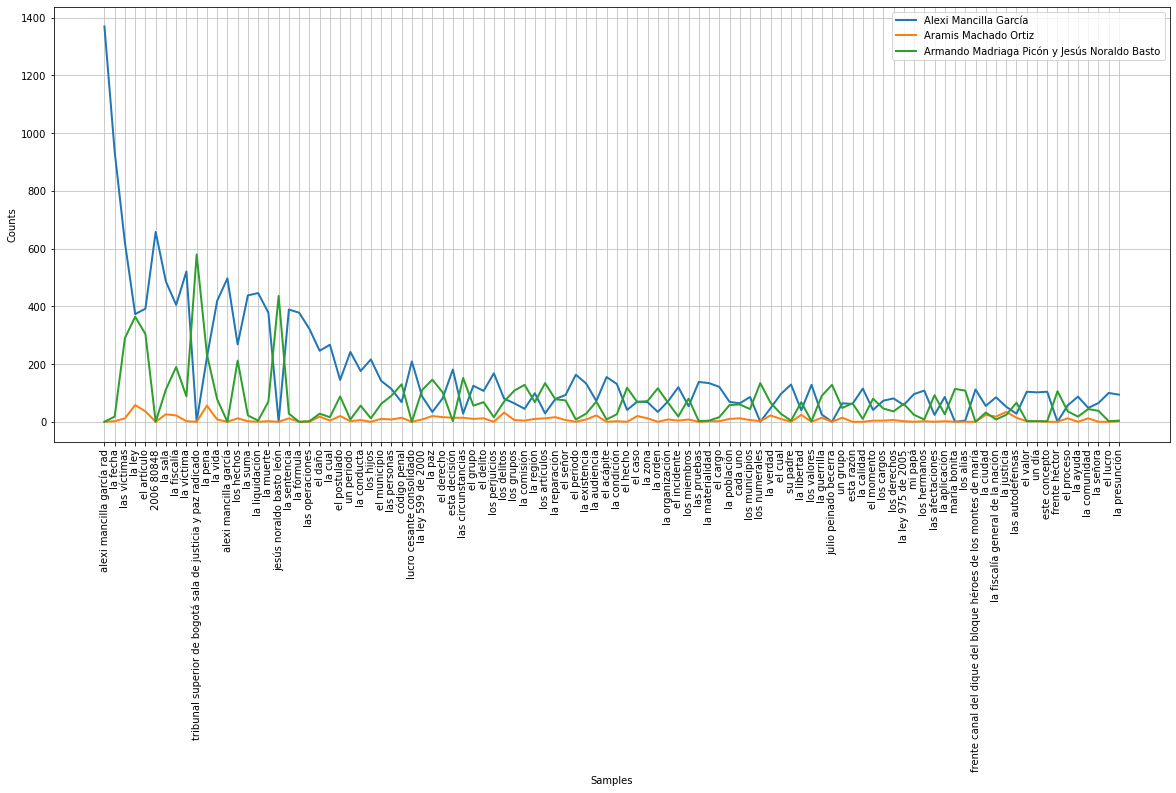

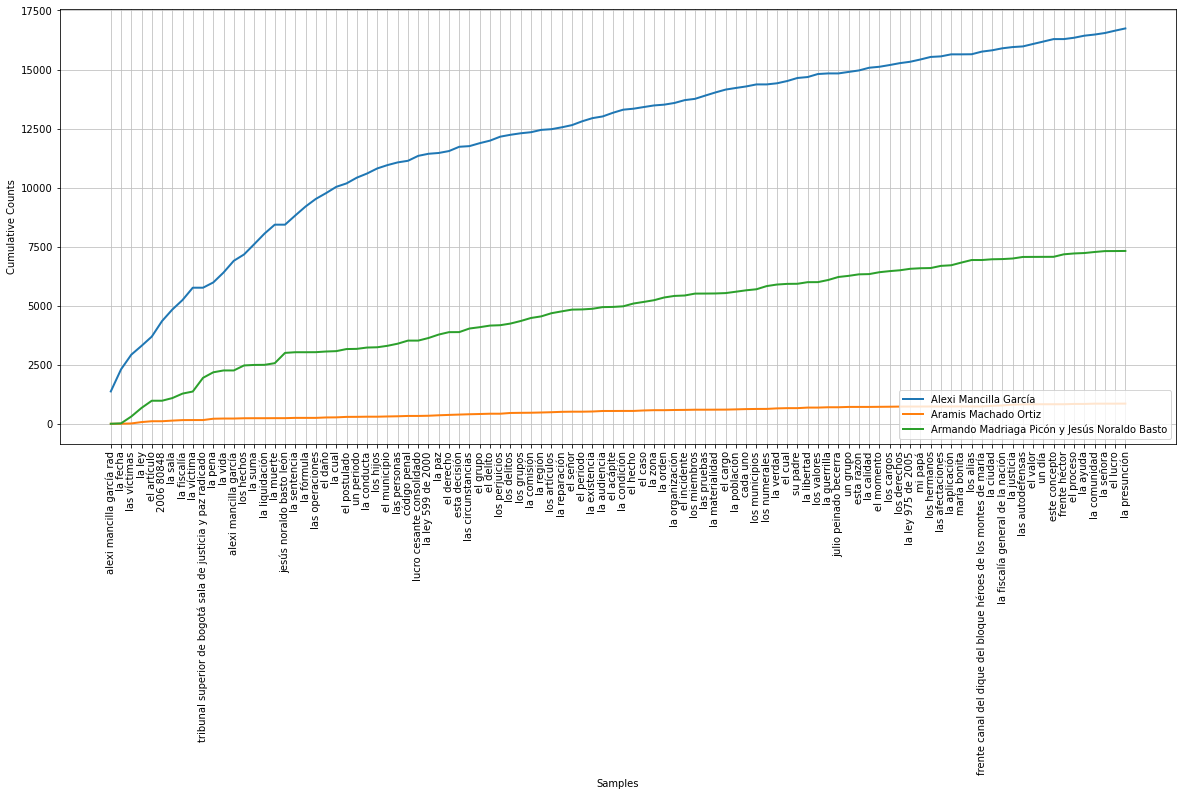

In [75]:
# doc = {'path': single_file, 'file_name': file_name, 'date': date_time_obj, 'year': date_time_obj.year, 'month': date_time_obj.month, 'day': date_time_obj.day, 'num_pages': len(pdf), 'pages_raw': list(pdf),  
#                   'text_raw': "\n\n".join(pdf), 'sentences': [], 'doc_parser': []}
# dict_sent = {'page': count_page, 'local_sent': count_sent_local, 'global_sent': count_sent, 'text_raw': item, 'text_clear': '', 'chunks': [], 'verbs': []}
label_sent = []
label_chunk_sent = {}
label_chunk = []
for item in list_texts_corpus[0:3]:
    label_sent.append(item['file_name'])
    key_name = item['file_name'] #item['file_name'].lower().strip()
    print(key_name)
    label_chunk_sent[key_name] = [item_chunk['text'].lower() for sent in item['sentences'] for item_chunk in sent['chunks']  if len(item_chunk['text'].split(' ')) > 1]
    label_chunk += label_chunk_sent[key_name]
print(label_sent) 
print(len(label_chunk), len(set(label_chunk)))
# print(label_chunk)

from collections import Counter
word_freq = Counter(label_chunk)
common_words = word_freq.most_common(100)
print(common_words)

cfd = nltk.ConditionalFreqDist(
           (title, word)
           for title in label_sent
           for word in label_chunk_sent[title])

label_words = [word for (word, freq) in common_words]
print(label_words)
# cfd.tabulate(conditions=label_sent, samples=label_words)
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 8)) 
cfd.plot(conditions=label_sent, samples=label_words)
plt.figure(figsize=(20, 8))
cfd.plot(conditions=label_sent, samples=label_words, cumulative=True)

In [98]:
# label_sent = []
# label_chunk_sent = {}
# label_chunk = []
import numpy as np
import pandas as pd

my_array = np.array([[item, sent_name] for sent_name in label_chunk_sent for item in label_chunk_sent[sent_name]] , dtype=object)

data = pd.DataFrame(my_array, columns = ['label', 'sent'])

print(data)
print(type(data))
print(data.dtypes)

                                                   label  \
0                                      judicial tribunal   
1      distrito judicial de bogotá sala de justicia y...   
2                             ricardo rendón puerta acta   
3                                           la audiencia   
4                                             los cargos   
...                                                  ...   
80155                           jesús noraldo basto león   
80156                               la presente decisión   
80157                                         el recurso   
80158                          la sala de casación penal   
80159                       la corte suprema de justicia   

                                               sent  
0                             Alexi Mancilla García  
1                             Alexi Mancilla García  
2                             Alexi Mancilla García  
3                             Alexi Mancilla García  
4        

In [104]:
print(data.nunique())
print(data['label'].value_counts().sort_index())
values = data[['label', 'sent']]

label    9429
sent        3
dtype: int64
-comunidad penitenciaria-                         2
-salvo prueba                                     3
0279 por valor de 1370000                         2
0376 por valor de novecientos mil pesos 900000    3
04112008 2002                                     2
                                                 ..
𝟎𝟎𝟒𝟖𝟔𝟕 𝐒                                          8
𝟎𝟎𝟒𝟖𝟔𝟕𝟏𝟒𝟐55  𝟏 𝐒                                  2
𝟎𝟎𝟒𝟖𝟔𝟕𝟏𝟕𝟏09  𝟏 𝐒                                  3
𝟎𝟎𝟒𝟖𝟔𝟕𝟗𝟗𝟖𝟖  𝟏 𝐒                                   3
𝟎𝟎𝟒𝟖𝟔𝟕𝟗𝟗𝟖𝟖 𝐒                                      3
Name: label, Length: 9429, dtype: int64


In [106]:
sorted_values = values['label'].sort_values().unique()

from dirty_cat import SimilarityEncoder

similarity_encoder = SimilarityEncoder(similarity='ngram')
transformed_values = similarity_encoder.fit_transform(
    sorted_values.reshape(-1, 1))

In [107]:
from sklearn.manifold import MDS

mds = MDS(dissimilarity='precomputed', n_init=10, random_state=42)
two_dim_data = mds.fit_transform(
    1 - transformed_values)  # transformed values lie
# in the 0-1 range, so 1-transformed_value yields a positive dissimilarity matrix
print(two_dim_data.shape)
print(sorted_values.shape)

(9429, 2)
(9429,)


In [116]:
import numpy as np

n_points = 50
np.random.seed(42)
from sklearn.neighbors import NearestNeighbors

random_points = np.random.choice(len(similarity_encoder.categories_[0]),n_points, replace=False)
nn = NearestNeighbors(n_neighbors=2).fit(transformed_values)
_, indices_ = nn.kneighbors(transformed_values[random_points])
indices = np.unique(indices_.squeeze())

Text(0.5, 1.0, 'multi-dimensional-scaling representation using a 3gram similarity matrix')

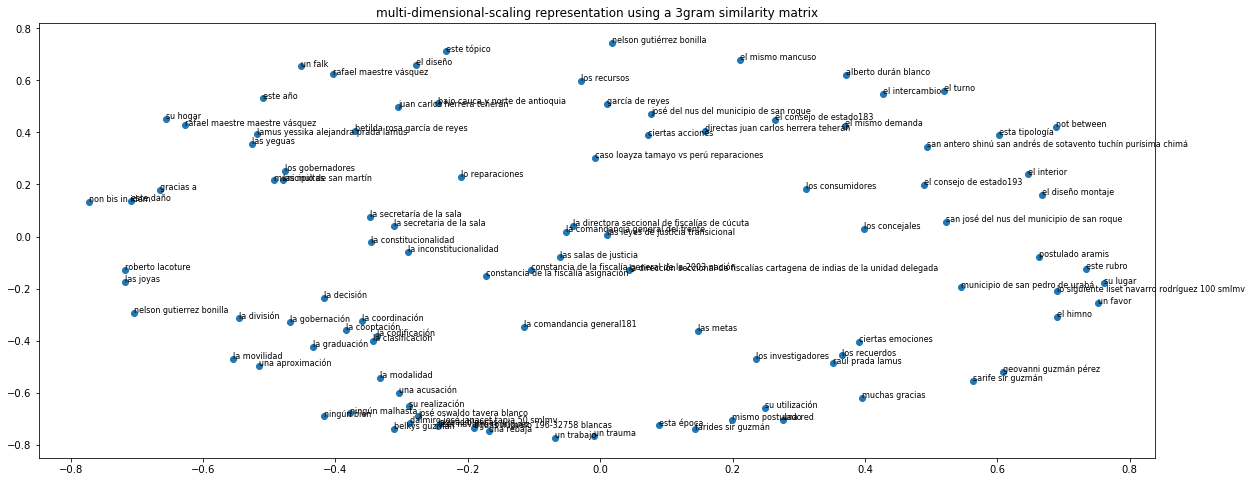

In [117]:
import matplotlib.pyplot as plt
# plt.figure(figsize=(20, 8)) 
f, ax = plt.subplots(figsize=(20, 8))
ax.scatter(x=two_dim_data[indices, 0], y=two_dim_data[indices, 1])
# adding the legend
for x in indices:
    ax.text(x=two_dim_data[x, 0], y=two_dim_data[x, 1], s=sorted_values[x],
            fontsize=8)
ax.set_title('multi-dimensional-scaling representation using a 3gram similarity matrix')

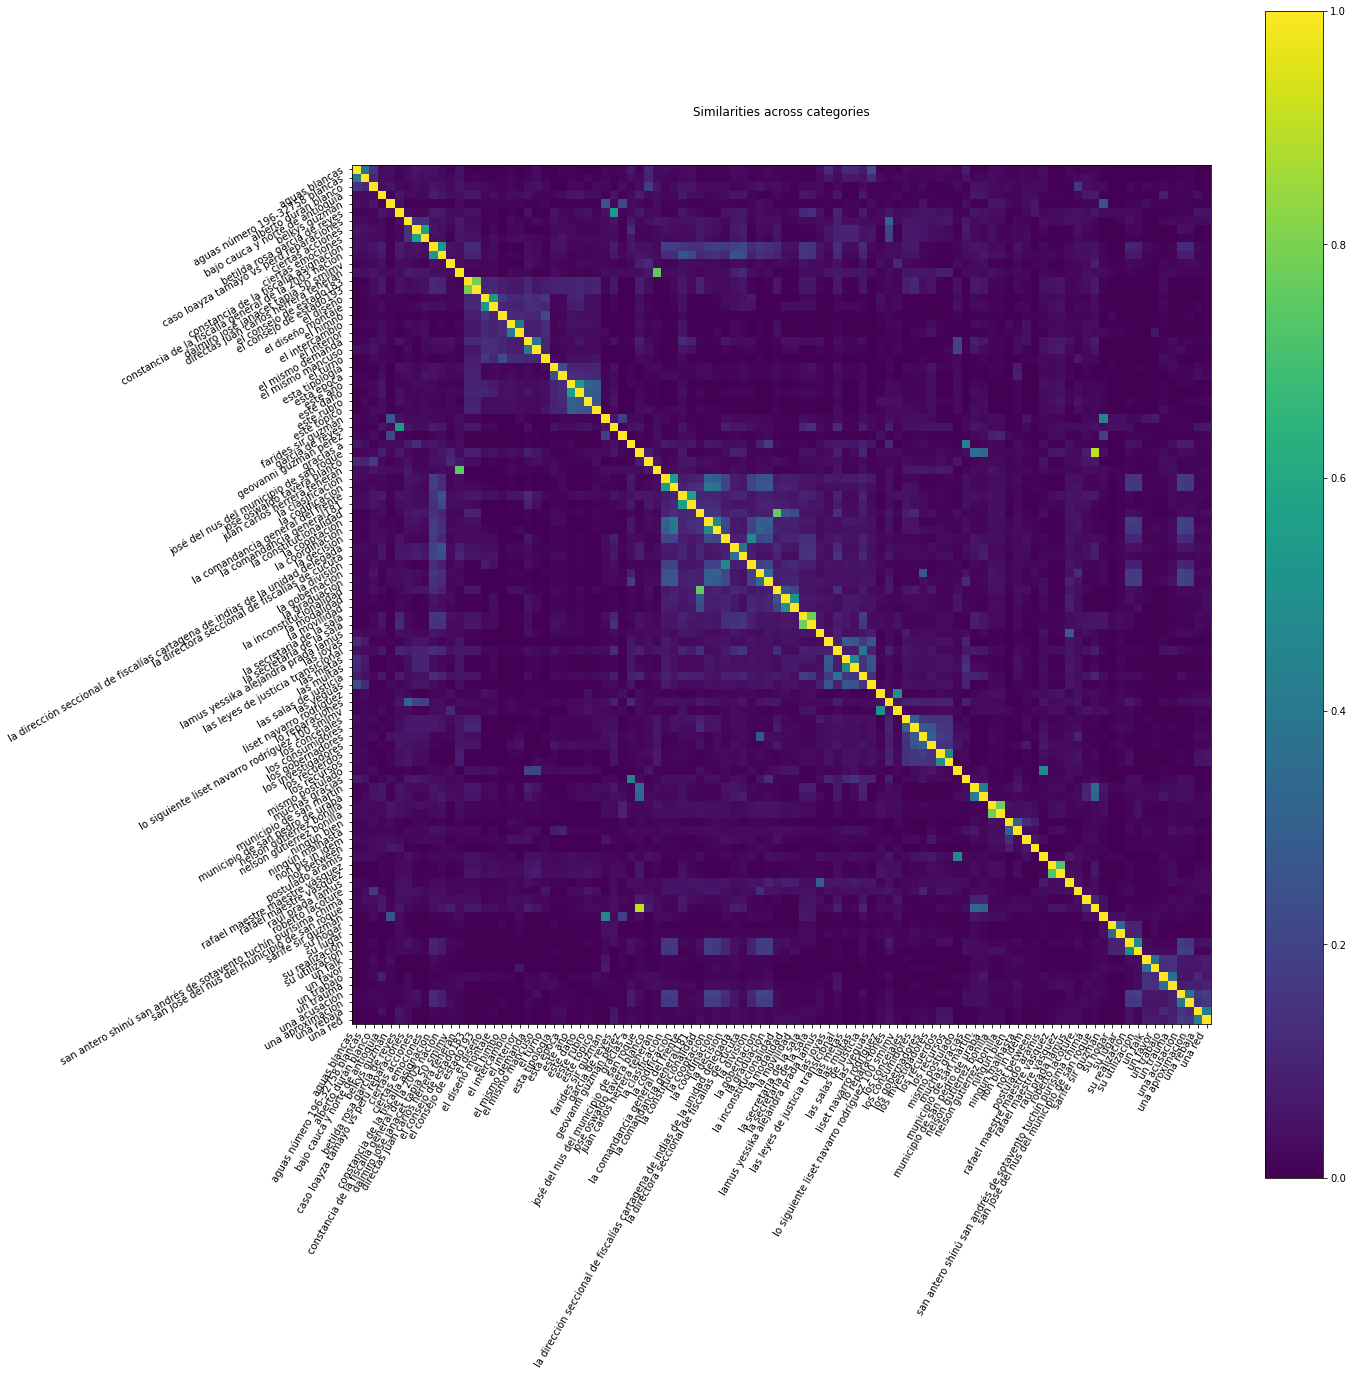

In [120]:
f2, ax2 = plt.subplots(figsize=(20, 20))
cax2 = ax2.matshow(transformed_values[indices, :][:, indices])
ax2.set_yticks(np.arange(len(indices)))
ax2.set_xticks(np.arange(len(indices)))
ax2.set_yticklabels(sorted_values[indices], rotation='30')
ax2.set_xticklabels(sorted_values[indices], rotation='60', ha='right')
ax2.xaxis.tick_bottom()
ax2.set_title('Similarities across categories')
f2.colorbar(cax2)
f2.tight_layout()